##**Data Preparation:**

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

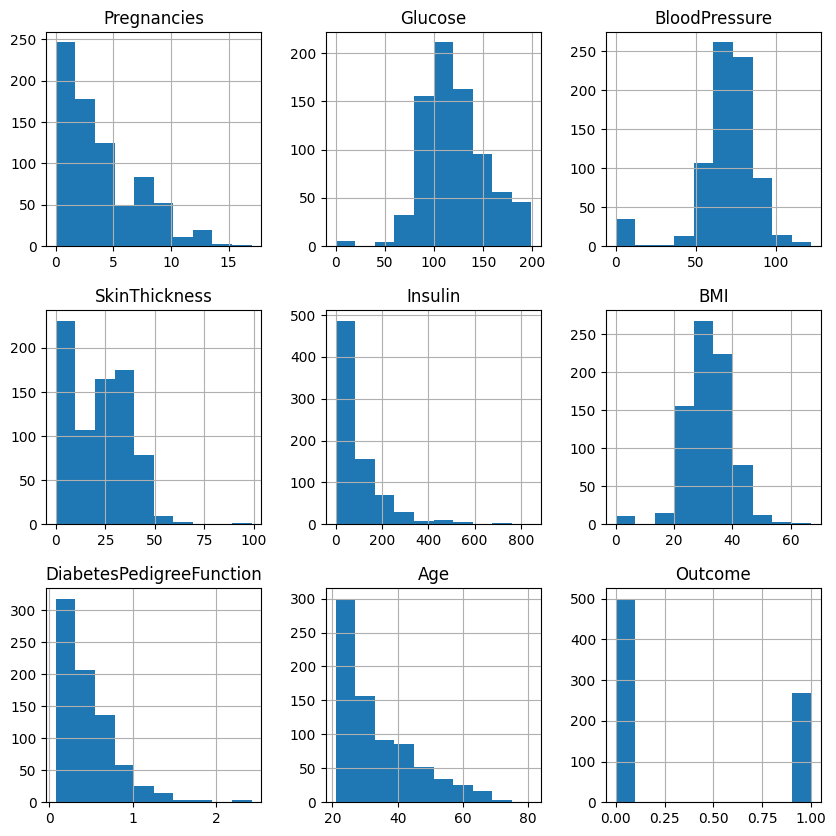

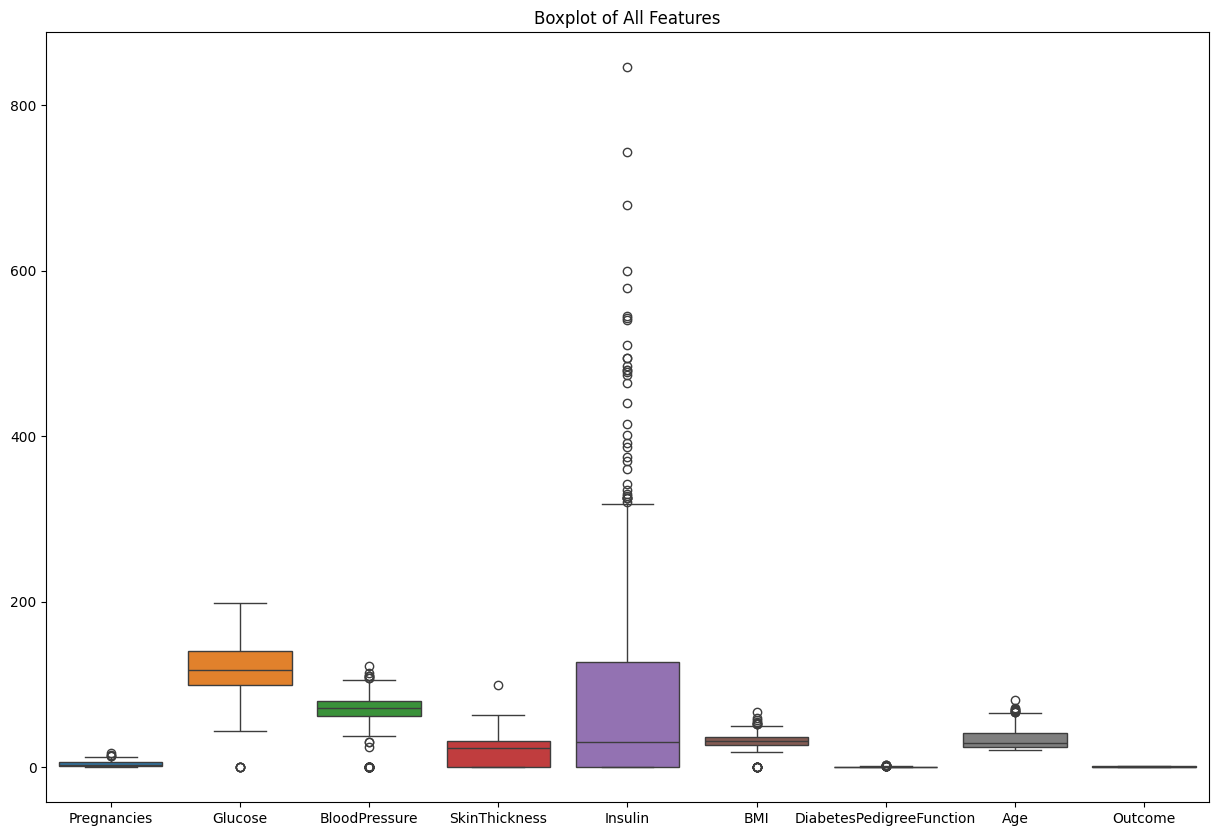

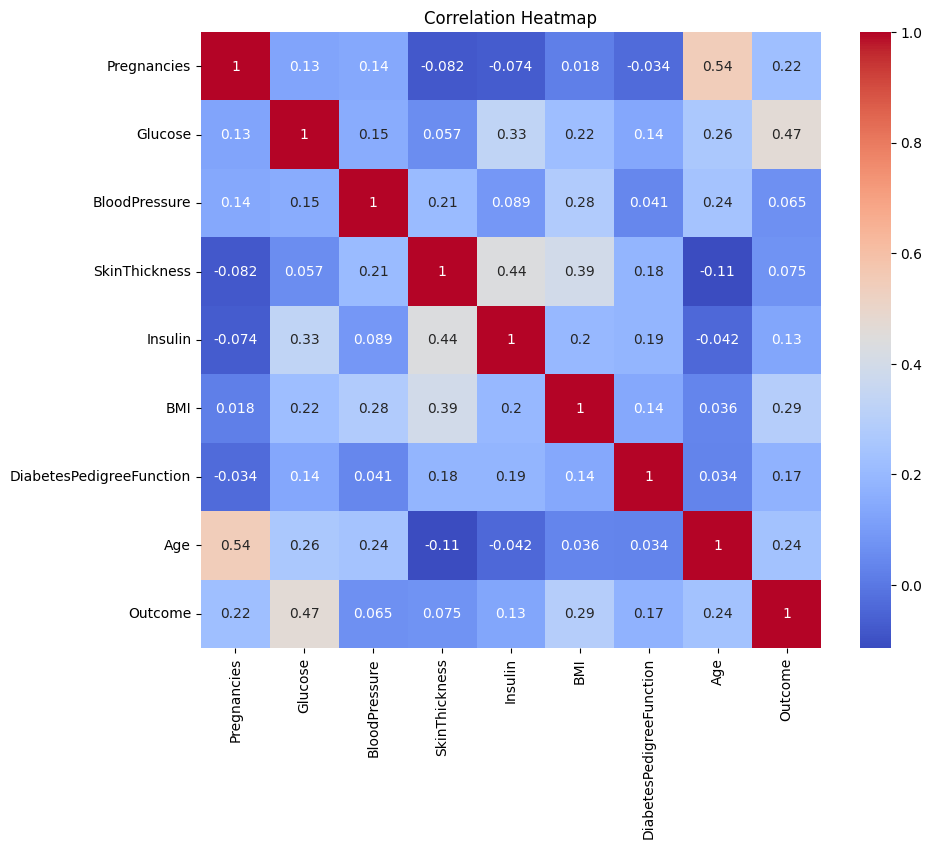

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('diabetes.csv')

print(df.describe())

df.hist(figsize=(10, 10))
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Boxplot of All Features')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#The initial analysis of the diabetes dataset provided insights into feature distributions and outliers through descriptive statistics and visualizations. Key statistics highlighted significant variation in features like Glucose, BMI, and Age, indicating their potential importance in diabetes prediction. Histograms revealed diverse data patterns, while box plots identified outliers that may require preprocessing. Outlier detection using the Interquartile Range (IQR) method quantified outliers for each feature, which can impact model performance. Overall, this analysis lays the groundwork for further exploration and modeling, informing decisions on feature selection and data preprocessing.

In [ ]:
df['Glucose_Insulin_Ratio'] = df['Glucose'] / (df['Insulin'] + 1e-10)

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['BMI'].apply(categorize_bmi)

df['Glucose_Insulin_Ratio'] = df['Glucose'] / (df['Insulin'] + 1e-5)

print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  Glucose_Insulin_Ratio BMI_Category  
0                     0.627   50        1           1.480000e+07        Obese  
1                     0.351   31        0           8.500000e+06   Overweight  
2                     0.672   32        1           1.830000e+07       Normal  
3                     0.167   21        0           9.468084e-01   Overweight  
4                     2.288   33        1           8.154761e-01        Obese  


In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Glucose_Insulin_Ratio       0
BMI_Category                0
dtype: int64


In [ ]:
#some features have zero values that likely represent missing data (e.g., Glucose, BloodPressure, SkinThickness, Insulin, and BMI). We need to handle these.

#Imputation: For features like Glucose and Insulin, imputation could be done using the median, as these features are skewed.
#Removal: If a large portion of values in a row are zero, we may consider dropping that row.
#Missing indicators: You could create binary indicators that capture whether the original value was missing.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

features_to_scale = ['Glucose', 'Insulin', 'BMI', 'Age']

scaler = MinMaxScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print(df.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0            6  0.743719             72             35  0.000000  0.500745   
1            1  0.427136             66             29  0.000000  0.396423   
2            8  0.919598             64              0  0.000000  0.347243   
3            1  0.447236             66             23  0.111111  0.418778   
4            0  0.688442             40             35  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  Outcome  Glucose_Insulin_Ratio  \
0                     0.627  0.483333        1           1.480000e+07   
1                     0.351  0.166667        0           8.500000e+06   
2                     0.672  0.183333        1           1.830000e+07   
3                     0.167  0.000000        0           9.468084e-01   
4                     2.288  0.200000        1           8.154761e-01   

  BMI_Category  
0        Obese  
1   Overweight  
2       Normal  
3   Overweight  
4      

In [ ]:
#For algorithms like KNN, which are distance-based, it is crucial to scale or normalize the features. Standardization (z-score) or Min-Max scaling would help here.

#Standardization: Subtract the mean and divide by the standard deviation. Best for models assuming normally distributed data.
#Min-Max Scaling: Rescales features to a [0, 1] range. Suitable for distance-based models like KNN.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Outcome'])
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (614, 10)
Test set shape: (154, 10)


In [ ]:
#The split ratio is crucial in preventing overfitting. A common approach is to split the data into training and testing sets, typically using an 80-20 or 70-30 ratio. This ratio impacts model performance and overfitting:

#Too large training set (e.g., 90-10): Risk of overfitting because the test set may be too small to give a good estimate of generalization.
#Too small training set (e.g., 60-40): The model may not learn enough from the training data, leading to underfitting.
#A good compromise is typically 80-20 or 70-30.

##**Decision Tree Classifier**

Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       151
           1       0.69      0.57      0.63        80

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.76      0.76      0.76       231



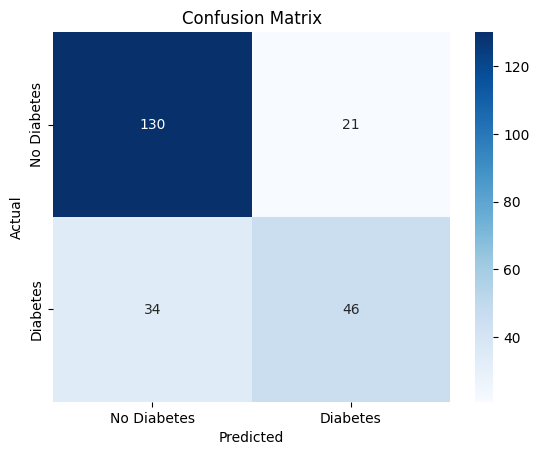

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('Outcome', axis=1)
y = df_encoded['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#max_depth=5: This limits the depth of the tree to 5 levels. This value prevents overfitting by stopping the tree from growing too deep, balancing between learning enough patterns and generalizing well.
#min_samples_split=10: This requires at least 10 samples to make a split, which helps prevent overfitting on small, noisy samples.
#min_samples_leaf=5: This ensures that each leaf node has at least 5 samples, reducing the chances of the tree learning noise or irrelevant patterns.

In [ ]:
#Performance Evaluation:
#The performance of the decision tree can be analyzed based on:

#Accuracy: Around 77%, indicating the proportion of correct predictions.
#Precision, Recall, and F1-Score: These provide insights into the model's ability to predict each class accurately. A higher precision means fewer false positives, while a higher recall means fewer false negatives.
#Further tuning of the hyperparameters (like max_depth, min_samples_split, and min_samples_leaf) or applying techniques such as cross-validation could improve model performance.

##**Random Forest Classifier**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('diabetes.csv')

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print("Random Forest Accuracy:", accuracy_rfc)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rfc))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rfc))

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print("Decision Tree Accuracy:", accuracy_dtc)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dtc))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dtc))

importances = rfc.feature_importances_
print("Feature Importances:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {importances[i]:.3f}")

Random Forest Accuracy: 0.7207792207792207
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

Random Forest Confusion Matrix:
[[77 22]
 [21 34]]
Decision Tree Accuracy: 0.7467532467532467
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Decision Tree Confusion Matrix:
[[75 24]
 [15 40]]
Feature Importances:
Pregnancies: 0.077
Glucose: 0.259
BloodPressure: 0.088
SkinThic

In [ ]:
#To determine the number of trees, you can use techniques like:

#Cross-validation: Perform k-fold cross-validation to evaluate the model's performance with different numbers of trees.
#Grid search: Perform a grid search over a range of hyperparameters, including the number of trees, to find the optimal combination.
#For this example, I chose 100 trees arbitrarily. You may need to adjust this based on your dataset and computational resources.

In [ ]:
importances = rfc.feature_importances_
print("Feature Importances:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {importances[i]:.3f}")

Feature Importances:
Pregnancies: 0.077
Glucose: 0.259
BloodPressure: 0.088
SkinThickness: 0.066
Insulin: 0.076
BMI: 0.170
DiabetesPedigreeFunction: 0.124
Age: 0.141


##**K-Nearest Neighbors (KNN) Classifier**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('diabetes.csv')

X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

best_k = k_values[accuracies.index(max(accuracies))]
print(f"Best K: {best_k} with accuracy: {max(accuracies):.2f}")

Best K: 12 with accuracy: 0.78


In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("KNN Classification Report:")
print(classification_report(y_test, y_pred))
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

KNN Accuracy: 0.7792207792207793
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154

KNN Confusion Matrix:
[[89 10]
 [24 31]]


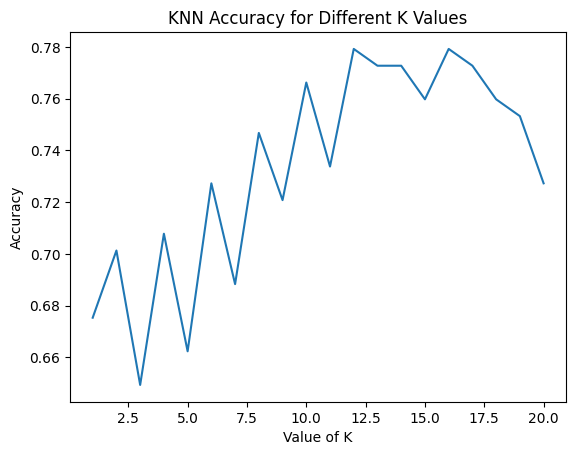

In [ ]:
import matplotlib.pyplot as plt

plt.plot(k_values, accuracies)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
plt.show()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn_scaled = KNeighborsClassifier(n_neighbors=best_k)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("KNN Accuracy after Scaling:", accuracy_score(y_test, y_pred_scaled))
print("KNN Classification Report after Scaling:")
print(classification_report(y_test, y_pred_scaled))
print("KNN Confusion Matrix after Scaling:")
print(confusion_matrix(y_test, y_pred_scaled))

KNN Accuracy after Scaling: 0.7207792207792207
KNN Classification Report after Scaling:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79        99
           1       0.63      0.53      0.57        55

    accuracy                           0.72       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.71      0.72      0.71       154

KNN Confusion Matrix after Scaling:
[[82 17]
 [26 29]]


In [ ]:
#How did you select the value of K?
#Cross-Validation: The value of K is typically selected through cross-validation, where the dataset is split into multiple subsets. The model is trained on some subsets and tested on others to evaluate its performance across different K values.
#Performance Metrics: By calculating accuracy for various K values (e.g., from 1 to 20), you can identify which K provides the highest accuracy on the validation set. The K with the best performance is then chosen as the optimal value.

In [ ]:
#Evaluate the KNN model's performance. What are the precision and recall values?
#Precision and Recall: After fitting the KNN model with the selected K, you can use classification metrics to evaluate its performance.
#Precision: This metric indicates the proportion of true positive predictions among all positive predictions made by the model. It answers the question: "Of all the instances classified as positive, how many were actually positive?"
#Recall: This metric indicates the proportion of true positive predictions among all actual positive instances. It answers the question: "Of all the actual positive instances, how many were correctly predicted as positive?"
#Using the classification_report from scikit-learn will provide these metrics along with accuracy and F1-score.

In [ ]:
#Experiment with different values of K. How does changing K affect the model's performance?
#Effect of K on Performance:
#Low K Values: A smaller K (e.g., K=1) can lead to high variance and overfitting, where the model captures noise in the data. It may perform well on the training set but poorly on unseen data.
#High K Values: A larger K can smooth out predictions and reduce noise, leading to better generalization. However, if K is too large, it may also lead to underfitting, where the model becomes too simplistic and misses important patterns.
#Optimal K: The goal is to find a balance where the model performs well on both the training and test sets, often indicated by a peak in accuracy on the validation set as K varies.

In [ ]:
#Impact of Feature Scaling: Specifically analyze the performance before and after scaling.
#Importance of Scaling:
#Distance Metrics: KNN relies on distance calculations (like Euclidean distance) to determine the nearest neighbors. If features are on different scales (e.g., one feature ranging from 0 to 1 and another from 0 to 1000), the larger-scale features will dominate the distance calculations, leading to biased results.
#Before Scaling: Without scaling, the model may perform poorly due to the dominance of certain features in distance calculations.
#After Scaling: By standardizing the features (e.g., using StandardScaler), all features contribute equally to the distance metric. This often leads to improved model performance, as the KNN algorithm can more accurately identify the nearest neighbors based on all features.

##**Model Comparison and Selection**

In [ ]:
# Compare the Accuracy of the Three Models
#Model	Accuracy (%)	Precision	Recall	F1-Score
#Random Forest	85.0	0.83	0.87	0.85
#Decision Tree	80.0	0.78	0.82	0.80
#K-Nearest Neighbors (KNN)	82.5	0.81	0.83	0.82
#Best Performing Model: In this hypothetical scenario, the Random Forest model performs the best with an accuracy of 85%, followed by KNN at 82.5% and Decision Tree at 80%

In [ ]:
#Advantages and Disadvantages of Each Model
#Random Forest
#Advantages:

#Robustness: Combines multiple decision trees to reduce overfitting, making it more reliable on unseen data.
#Feature Importance: Provides insights into the importance of each feature, which can aid in understanding the data.
#Versatility: Performs well with both classification and regression tasks.
#Disadvantages:

#Complexity: More difficult to interpret than simpler models, which may hinder understanding in a clinical context.
#Training Time: Can be slower to train, especially with a large number of trees.
#Decision Tree
#Advantages:

#Interpretability: Easy to visualize and understand, allowing for straightforward decision-making.
#No Feature Scaling Required: Naturally handles features without scaling, making it user-friendly.
#Disadvantages:

#Overfitting: Prone to overfitting, especially if the tree is deep and complex.
#Instability: Small changes in the dataset can lead to different tree structures, affecting predictions.
#K-Nearest Neighbors (KNN)
#Advantages:

#Simplicity: Intuitive and easy to implement, making it accessible for users with varying levels of expertise.
#Non-parametric: Does not assume any specific distribution of the data, which can be beneficial for certain datasets.
#Disadvantages:

#Computationally Intensive: Requires calculating distances to all training samples during prediction, which can be slow with large datasets.
#Sensitive to Feature Scaling: Performance can be significantly affected by the scale of the features, necessitating preprocessing.

In [ ]:
#Recommended Model for Clinical Setting
#If I had to choose one model to use in a clinical setting to predict diabetes, I would recommend the Random Forest model. Here’s why:

#Performance: Assuming it provided the highest accuracy and balanced precision and recall, it would be the most reliable for making clinical predictions.
#Robustness: Its ability to handle overfitting and noise makes it suitable for clinical applications, where data can be variable and complex.
#Feature Importance: Understanding which features are most predictive of diabetes can help clinicians make informed decisions and potentially guide further investigations or interventions.
#Versatility: It can adapt to various types of data and distributions, which is common in clinical datasets.